In [1]:
import sys, os
sys.path.insert(0, r"C:\Users\dinod\Desktop\EE python\EE-python\Instruments")

from pySDS1104XE.pySDS1104XE.core import SDS1104XE
import time
import matplotlib.pyplot as plt

import siglent_scpi

# 1. Connect
scope = SDS1104XE("TCPIP0::192.168.1.155::5025::SOCKET")


# 2. Identify & reset
print(scope.identify())


Siglent Technologies,SDS1104X-E,SDSMMGKC7R2239,8.3.6.1.37R10


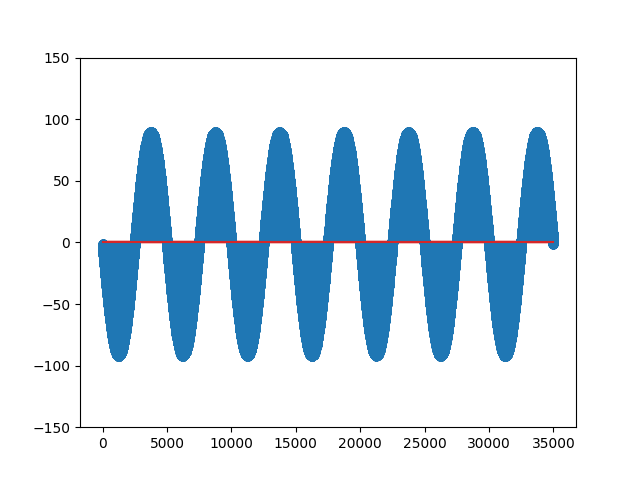

In [9]:
%matplotlib widget

data = scope.get_raw2(channel=1)
plt.stem(data)
plt.ylim(-150, 150)
plt.show()

In [47]:
scope.inst.chunk_size = 10**6
scope.inst.write("CHDR OFF")
scope.inst.write(f"C1:WF? DAT2")
time.sleep(0.3)
raw = list(scope.inst.read_raw())
time.sleep(0.1)

print(raw)
print(len(raw))


[10]
1


In [50]:
scope.inst.write("CHDR OFF")
time.sleep(0.3)
scope.inst.write("WFSU SP,0,NP,0,FP,0")
time.sleep(0.3)
raw = scope.inst.read_raw(2 + N + data_len + 2)
time.sleep(0.3)
print(repr(raw))


NameError: name 'N' is not defined

In [234]:
# assume you've already done:
scope.inst.write("CHDR OFF")
scope.inst.write("WFSU SP,0,NP,0,FP,0")
scope.inst.chunk_size = 10**6    # big buffer
scope.inst.timeout    = 5000     # 5 s max

# now this will find “#…” immediately
raw = scope.inst.query_binary_values(
    "C1:WF? DAT2",
    datatype='B',      # unsigned bytes
    container=bytes
)
print(f"Received {len(raw)} bytes")


ValueError: Could not find hash sign (#) indicating the start of the block. The block begin by bytearray(b'\n')

In [2]:
scope.configure_acquisition(mode='SAMPLING')
time.sleep(1)

scope.configure_channel(channel=1, range=0.1, coupling="D1M")
time.sleep(1)

In [137]:
data = scope.get_waveform(channel=2)

plt.plot(data)
plt.show()
print(len(data))

IndexError: pop from empty list